In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price']=boston.target

In [11]:
y = bos.Price
x = bos.drop(['Price','INDUS','AGE'],axis=1)

In [14]:
import statsmodels.api as sm


In [17]:
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
model.summary()

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          5.54e-137
Time:                        10:20:19   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
!pip install mlxtend

# Assumption-1 no multicollinearity among independent variables

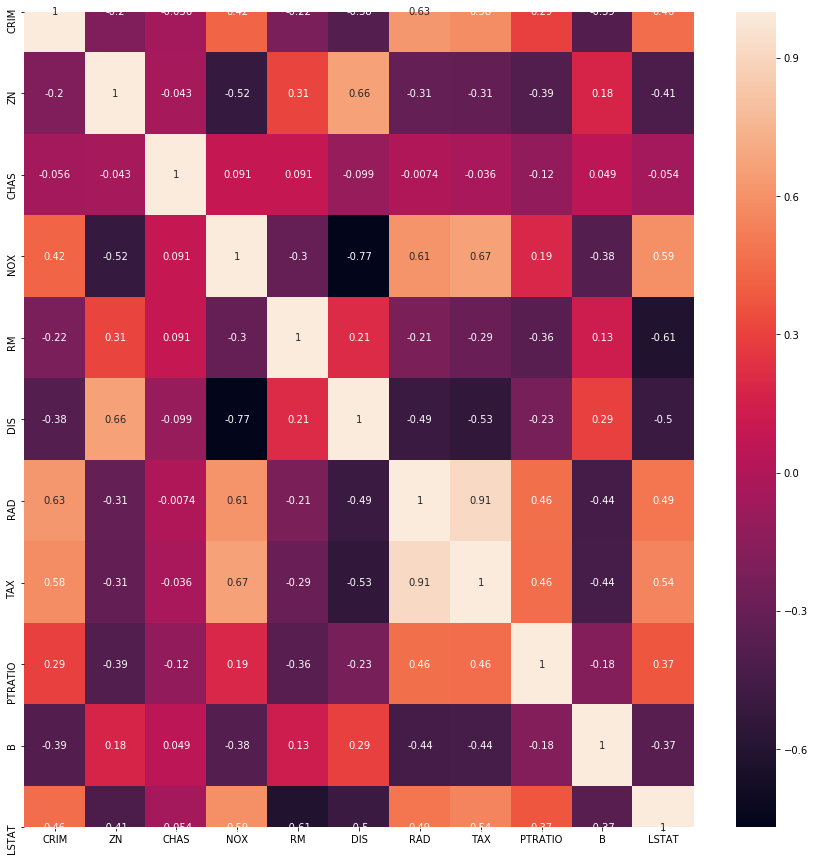

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(),annot=True)


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
pd.DataFrame([vif(xc.values, i) for i in range (xc.shape[1])],index=xc.columns,columns= ['vif'] )

,vif
const,579.255845
CRIM,1.789704
ZN,2.239229
CHAS,1.059819
NOX,3.778011
RM,1.834806
DIS,3.443420
RAD,6.861126
TAX,7.272386
PTRATIO,1.757681


since no of observation in the data is only 500, we choose 10 as the vif cout-off 
hence, we didn't remove any feature base on vif

note:- vif analysis must be done with constant in the data. otherwise the vif will be misleading

In [28]:
y = bos.Price
x = bos.drop(['Price','INDUS',"AGE"],axis=1)
## remove the feature indus and age based only on the probability (significancy)

# assumption 2 residuals must be normally distributed with mean zero

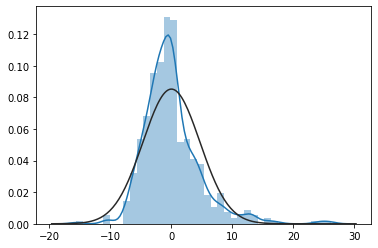

In [38]:
model = sm.OLS(y,xc).fit()
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid,fit = norm)

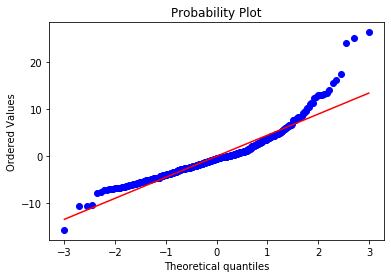

In [40]:
from scipy import stats as sct
sct.probplot(model.resid,plot = plt)
plt.show()

In [41]:
# stats test normality

print (sct.jarque_bera(model.resid))

(787.7851418746452, 0.0)


since probablity is less than 0.05 we will reject H0 and conclude that residuals are not normallhy distibuted

In [43]:
y = np.log(bos.Price)
x = bos.drop(['Price','INDUS',"AGE"],axis=1)
xc = sm.add_constant(x)

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          4.31e-159
Time:                        11:57:38   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

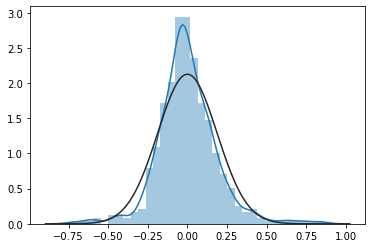

In [48]:
model = sm.OLS(y,xc).fit()
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid,fit = norm)

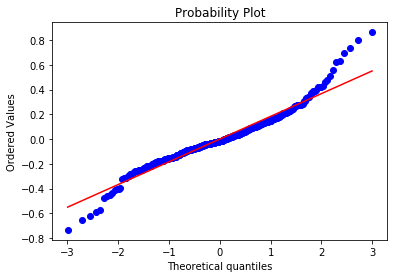

In [47]:
from scipy import stats as sct
sct.probplot(model.resid,plot = plt)
plt.show()

In [49]:
sct.jarque_bera(model.resid)

(227.36073522664645, 0.0)

In [52]:
y = np.log(bos.Price)
x = bos.drop(['Price','INDUS',"AGE"],axis=1)
x = np.log1p(x)
xc = sm.add_constant(x)

#since transformatin of y didn't solve the problem of normalaty 
#we transformed the x dataset , log1p was used because there are zero in the data, 
#this function will add 1 to the features before taking log

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 10 Mar 2020   Prob (F-statistic):          4.31e-159
Time:                        12:01:46   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

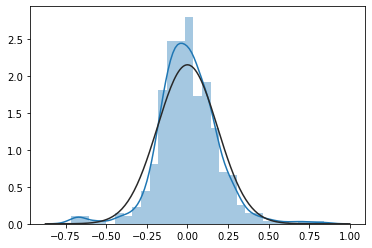

In [53]:
model = sm.OLS(y,xc).fit()
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid,fit = norm)

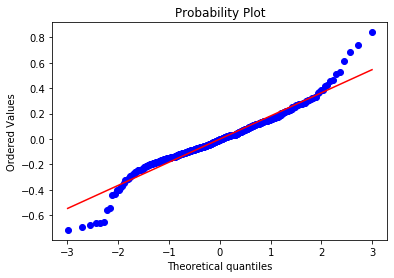

In [54]:
from scipy import stats as sct
sct.probplot(model.resid,plot = plt)
plt.show()

# assumption 3 residuals are homoscedastic

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


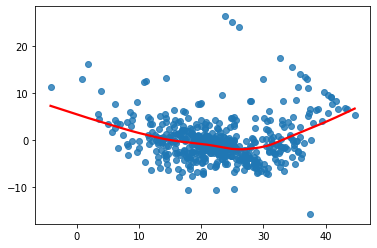

In [59]:
y = bos.Price
x = bos.drop(['Price','INDUS','AGE'],axis=1)
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
y_pred = model.predict(xc)
resids = model.resid

sns.regplot(y_pred,resids,lowess= True, line_kws={'color':'r'})

the plot shows that there is trend is the residuals . it larger value in for residuals for lower y_predict and high y_predict


# goldfeld test for checking homoscedasticity

In [60]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['f-statistics','p-value']
test  = sms.het_goldfeldquandt(model.resid,model.model.exog)
print(lzip(name,test))

[('f-statistics', 2.2836707086343964), ('p-value', 1.3454126630538586e-10)]


H0: variance od residual is constant across the range of data
Ha: variance od residual is not constant across the range of data

since p-value is less than 0.05 we will reject the h0 to conculude that residuals are heteroscedastic

transformation of y made the homoscedasticity worse as probability is lower compared to model without transform

# assumption-4 there is no autocorrelation amoung the residuals

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


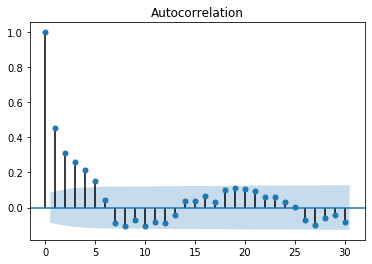

In [67]:
y = bos.Price
x = bos.drop(['Price','INDUS','AGE'],axis=1)
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid,lags=30,alpha=0.05)
acf.show()

DW statistic for any model will be between 0 and 4. To conclude that there is auto-correlation DW-statistic should around 
2. the DW statistic for the model is 1.078 and this indicates the moderate level of autocorrelation

# assumption 5 linearity of relationship

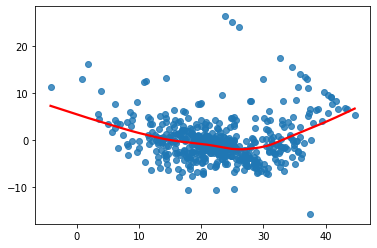

In [68]:
y = bos.Price
x = bos.drop(['Price','INDUS','AGE'],axis=1)
xc = sm.add_constant(x)
model = sm.OLS(y,xc).fit()
y_pred = model.predict(xc)
resids = model.resid

sns.regplot(y_pred,resids,lowess= True, line_kws={'color':'r'})

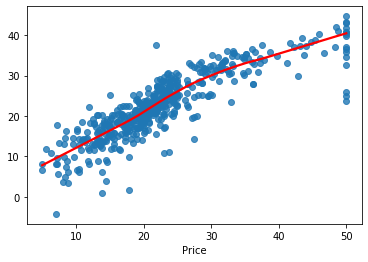

In [72]:
sns.regplot(y = y_pred,x = y,lowess= True, line_kws={'color':'r'})

The pattern expected from residuals are plotted against y_pred is a horizontal line around 0 .The pattern in the graph suggests that model design needs to improve (we may need to add square and multiplicative terms to the model)

The expected pattern when y an y_pred is plotted is a line passing through origin with a slope osf 45 degrees. However the model shows a pattern away from expected.

# rainbow test for linearity of residuals

In [77]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)

(0.5781612495333303, 0.9999908142705343)

H0: residuals exhibit leaniearity
H1: residuals exhibit non-leaniearity

based on the test we can conclude that there is no serious non linearity

# ML

In [79]:
df =  pd.read_csv('file:///C:/Users/dell/Downloads/airline%20cost%20new.csv')

In [80]:
df

,num_pass,cost
0,61,4280
1,63,4080
2,67,4420
3,69,4170
4,70,4480
5,74,4300
6,76,4820
7,81,4700
8,86,5110
9,91,5130


In [87]:
y = df.cost
x = df.num_pass

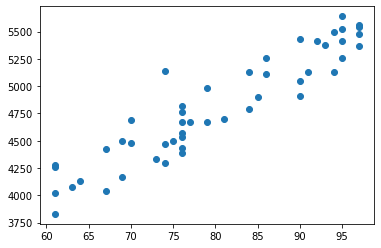

In [91]:
plt.scatter(x,y)

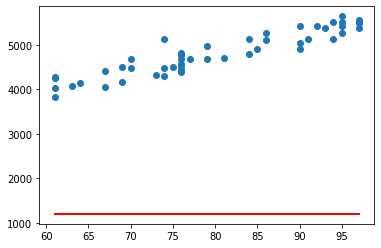

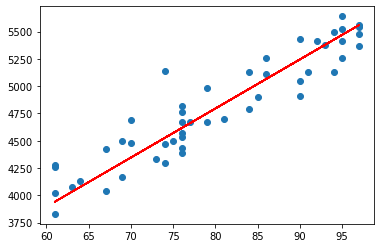

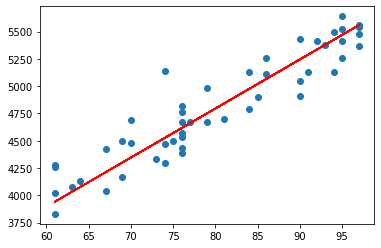

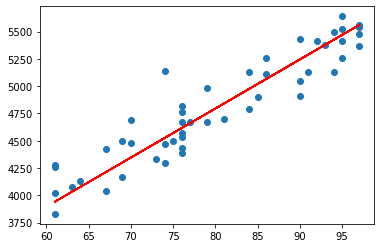

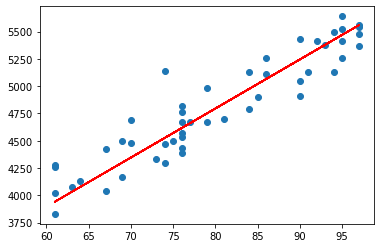

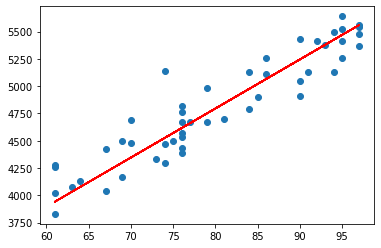

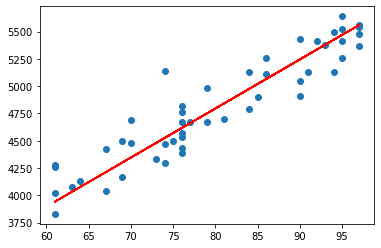

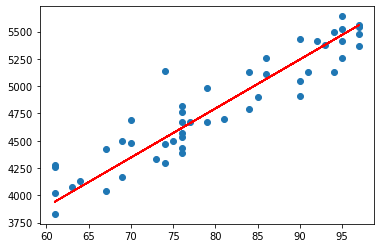

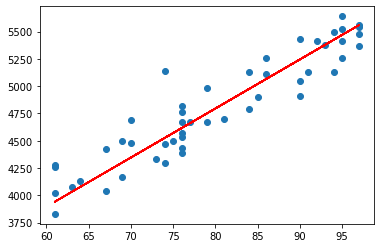

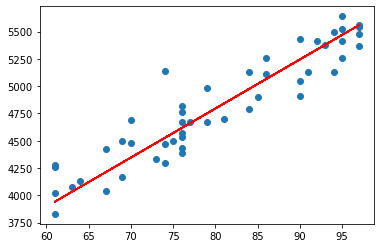

44.91673999004253 1202.185208925504


In [103]:
 m = 0
c = 1200

l = 0.0001
epochs = 1000
n=float(len(x))

for i in range(epochs):
    y_pre = m*x+c
    d_m = (-2/n)*sum(x*(y-y_pre))
    d_c = (-2/n)*sum(y-y_pre)
    
    m = m-d_m*l
    c= c-d_c*l
    
    if (i%100)==0:
        plt.scatter(x,y)
        plt.plot(x,y_pre,'r')
        plt.show()
print (m, c)

In [110]:
y = bos['Price']
X = bos.drop('Price', axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
print(X_train.shape, X_test.shape)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()

lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)

y_test_pred = lr.predict(X_test)

print('r-square for train: ', r2_score(y_train,y_train_pred))
print('RMSE for train: ', np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('r-square for test: ', r2_score(y_test,y_test_pred))
print('RMSE for test: ', np.sqrt(mean_squared_error(y_test,y_test_pred)))

(354, 13) (152, 13)
r-square for train:  0.7419034960343789
RMSE for train:  4.734946300650552
r-square for test:  0.7147895265576849
RMSE for test:  4.736236488050141
